## Penguins

The `seaborn` package has a bunch of included data sets, such as the `penguins`data set.

In [1]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
penguins.shape

(344, 7)

In [3]:
from collections import Counter
Counter(penguins.island)

Counter({'Torgersen': 52, 'Biscoe': 168, 'Dream': 124})

We can plot this using `countplot`.

<AxesSubplot:xlabel='island', ylabel='count'>

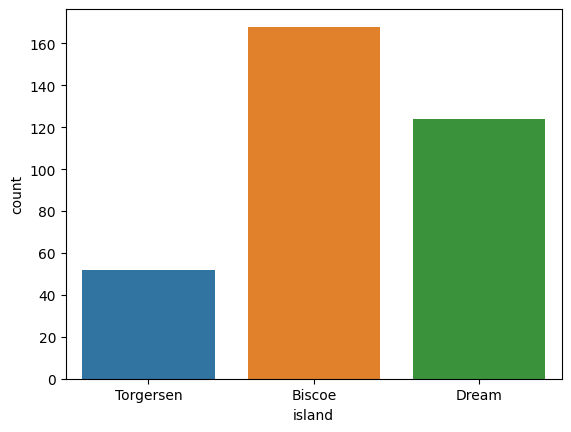

In [4]:
sns.countplot(x="island", data=penguins)

Using `groupby` we can calculate summary statistics across groups.

In [5]:
penguins.groupby("island").mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.950980,18.429412,191.196078,3706.372549


This also works for other functions, e.g. `std`.

In [6]:
penguins.groupby("island").std()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,4.772731,1.820721,14.142268,782.855743
Dream,5.953527,1.133116,7.507366,416.644112
Torgersen,3.025318,1.339447,6.232238,445.107940


Now let's run a regression! Our categorical covariates are the islands; our response is the bill length.

In [9]:
import statsmodels.formula.api as smf

fit = smf.ols("""bill_length_mm ~ I(1 * (island == 'Biscoe'))
  + I(1 * (island == 'Dream')) 
  + I(1 * (island == 'Torgersen')) - 1""", 
  data = penguins).fit()
  
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     30.86
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.86e-13
Time:                        14:16:06   Log-Likelihood:                -1036.7
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     339   BIC:                             2091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
I(1 * (island == 'Biscoe'))       45.2575      0.390    116.127      0.000      44.491      46.024
I(1 * (island == 'Dream'))        44.1677      0.452     97.657      0.000      43.278      45.057
I(1 * (island == 'Torgersen'))    38.9510      0.705     55.232      0.000      37.564      40.338
==============================================================================
Omnibus:                        8.214   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.722
Skew:                          -0.064   Prob(JB):                       0.0943
Kurtosis:                       2.439   Cond. No.                         1.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
fit = smf.ols("bill_length_mm ~ C(island) - 1", data = penguins).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     30.86
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.86e-13
Time:                        14:16:40   Log-Likelihood:                -1036.7
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     339   BIC:                             2091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(island)[Biscoe]       45.2575      0.390    116.127      0.000      44.491      46.024
C(island)[Dream]        44.1677      0.452     97.657      0.000      43.278      45.057
C(island)[Torgersen]    38.9510      0.705     55.232      0.000      37.564      40.338
==============================================================================
Omnibus:                        8.214   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.722
Skew:                          -0.064   Prob(JB):                       0.0943
Kurtosis:                       2.439   Cond. No.                         1.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
fit.pvalues

C(island)[Biscoe]       4.681012e-275
C(island)[Dream]        2.708558e-250
C(island)[Torgersen]    1.475592e-171
dtype: float64

Here we see that all of the beta coefficients are highly significant. But what does that mean? It means that the mean length of the bills are unlikely to be  for every island! What we typically care about is whether there is a difference between the islands, say Biscoe and Dream.

In [13]:
fit2 = smf.ols("bill_length_mm ~ C(island)", data = penguins).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     30.86
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.86e-13
Time:                        14:16:51   Log-Likelihood:                -1036.7
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     339   BIC:                             2091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 45.2575      0.390    116.127      0.000      44.491      46.024
C(island)[T.Dream]        -1.0897      0.597     -1.825      0.069      -2.264       0.085
C(island)[T.Torgersen]    -6.3065      0.806     -7.827      0.000      -7.891      -4.722
==============================================================================
Omnibus:                        8.214   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.722
Skew:                          -0.064   Prob(JB):                       0.0943
Kurtosis:                       2.439   Cond. No.                         3.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this run of the regression model, there is no `C(island)[Biscoe]` because this coefficient has been absorbed into a *baseline*.



In [14]:
fit.params

C(island)[Biscoe]       45.257485
C(island)[Dream]        44.167742
C(island)[Torgersen]    38.950980
dtype: float64

In [15]:
fit2.params


Intercept                 45.257485
C(island)[T.Dream]        -1.089743
C(island)[T.Torgersen]    -6.306505
dtype: float64

How do we find the predicted value for `Dream`? Add the baseline!

In [16]:
fit2.params[0] + fit2.params[1]


44.16774193548388

In [17]:
fit.params[1]


44.16774193548388

## Titanic

In [18]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic.shape

(891, 15)

In [20]:
titanic.groupby("sex").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [21]:
smf.ols("survived ~ C(sex)", data = titanic).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.41e-69
Time:                        14:17:41   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7420      0.023     32.171      0.000       0.697       0.787
C(sex)[T.male]    -0.5531      0.029    -19.298      0.000      -0.609      -0.497
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How about $k$ categories then?

In [22]:
from collections import Counter
Counter(titanic["class"])

Counter({'Third': 491, 'First': 216, 'Second': 184})

In [23]:
smf.ols("survived ~ Q('class')", data = titanic).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     57.96
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           2.18e-24
Time:                        14:17:44   Log-Likelihood:                -567.30
No. Observations:                 891   AIC:                             1141.
Df Residuals:                     888   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6296      0.031     20.198      0.000       0.568       0.691
Q('class')[T.Second]    -0.1568      0.046     -3.412      0.001      -0.247      -0.067
Q('class')[T.Third]     -0.3873      0.037    -10.353      0.000      -0.461      -0.314
==============================================================================
Omnibus:                     1364.423   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.840
Skew:                           0.421   Prob(JB):                     1.39e-19
Kurtosis:                       1.723   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since both *p*-values are truly small, class has an effect. 

In [24]:
smf.ols("survived ~ Q('class')", data = titanic.sample(n = 20, random_state=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.866
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.185
Time:                        14:17:47   Log-Likelihood:                -12.531
No. Observations:                  20   AIC:                             31.06
Df Residuals:                      17   BIC:                             34.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6000      0.220      2.732      0.014       0.137       1.063
Q('class')[T.Second]     0.2000      0.311      0.644      0.528      -0.455       0.855
Q('class')[T.Third]     -0.3000      0.269     -1.115      0.280      -0.868       0.268
==============================================================================
Omnibus:                        2.667   Durbin-Watson:                   2.751
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.176
Skew:                           0.065   Prob(JB):                        0.555
Kurtosis:                       1.819   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The $F$ test.

In [25]:
import pandas as pd
import statsmodels.formula.api as smf
# Example taken from https://towardsdatascience.com/anova-test-with-python-cfbf4013328b.
students = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")
students.head()

HTTPError: HTTP Error 503: Service Unavailable

In [ ]:
students.major.dtype

This is already encoded as categorical data!

In [ ]:
smf.ols("salary ~ major - 1", data = students).fit().summary()

This data contains more categorical variables, e.g. `minor`.

In [ ]:
smf.ols("salary ~ major + minor - 1", data = students).fit().summary()

Can we find the $F$ statistic for the minor too? Yes, by using `anova_lm`! (With argumen `type = 3`.)

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_lm(smf.ols("salary ~ major + minor - 1", data = students).fit(), type = 3)

We can continue on with this, testing, e.g., the influence of religion.

In [ ]:
smf.ols("salary ~ major + minor + religion - 1", data = students).fit().summary()

In [ ]:
anova_lm(smf.ols("salary ~ major + minor + religion - 1", data = students).fit(), type = 3)

It also works for numerical covariates.

In [ ]:
anova_lm(smf.ols("salary ~ major + minor + religion + age - 1", data = students,).fit(), type = 3)